Image Data Commons is one of the largest cancer imaging databases in the world. It houses > 150 open-source datasets. This is a simple notebook to get started with exploring and downloading these datases. Here is the link to imaging data commons (https://portal.imaging.datacommons.cancer.gov/)

In [2]:
# Install idc-index toolkit to interact with IDC
!pip install idc-index --upgrade

^C


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl.metadata (34 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/57.3 MB ? eta -:--:--
   --- ------------------------------------ 5.5/57.3 MB 28.0 MB/s eta 0:00:02
   -------- ------------------------------- 12.1/57.3 MB 30.2 MB/s eta 0:00:02
   ------------ --------------------------- 17.3/57.3 MB 28.0 MB/s eta 0:00:02
   --------------- ------------------------ 22.8/57.3 MB 27.2 MB/s eta 0:00:02
   ------------------- -------------------- 28.3/57.3 MB 27.2 MB/s eta 0:00:02
   ----------------------- ---------------- 34.3/57.3 MB 

In [4]:
!pip install pydicom 

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 24.3 MB/s eta 0:00:00


In [5]:
from idc_index import index

client = index.IDCClient()
df = client.index
print(f"You are working with the IDC data release version {client.get_idc_version()}")
print(f"This is how many DICOM series we have in IDC: {len(client.index)}")
# List all the columns
print("\nThis is the information we have for each dicom series:")
print("\n".join(client.index.columns))

You are working with the IDC data release version v18
This is how many DICOM series we have in IDC: 897106

This is the information we have for each dicom series:
collection_id
analysis_result_id
PatientID
SeriesInstanceUID
StudyInstanceUID
source_DOI
PatientAge
PatientSex
StudyDate
StudyDescription
BodyPartExamined
Modality
Manufacturer
ManufacturerModelName
SeriesDate
SeriesDescription
SeriesNumber
instanceCount
license_short_name
series_aws_url
series_size_MB


In [6]:
# Get a list of all the collections / datasets on IDC
collections = client.get_collections()
print(collections)

['ispy2', 'covid_19_ny_sbu', 'qin_breast', 'rider_lung_pet_ct', 'tcga_blca', 'phantom_fda', 'naf_prostate', 'acrin_6698', 'ispy1', 'gbm_dsc_mri_dro', 'acrin_nsclc_fdg_pet', 'acrin_contralateral_breast_mr', 'cc_tumor_heterogeneity', 'cptac_cm', 'anti_pd_1_lung', 'remind', 'lung_pet_ct_dx', 'duke_breast_cancer_mri', 'cmb_lca', 'cptac_luad', 'pediatric_ct_seg', 'tcga_brca', 'lidc_idri', 'cptac_ucec', 'ea1141', 'covid_19_ar', 'prostate_anatomical_edge_cases', 'icdc_glioma', 'acrin_flt_breast', 'nlst', 'prostate_mri_us_biopsy', 'cmb_pca', 'nsclc_radiomics', 'prostate_fused_mri_pathology', '4d_lung', 'rider_pilot', 'tcga_kirp', 'rider_lung_ct', 'tcga_ov', 'vestibular_schwannoma_seg', 'breast_mri_nact_pilot', 'cptac_pda', 'tcga_thym', 'qiba_ct_1c', 'midrc_ricord_1c', 'cmb_gec', 'c4kc_kits', 'tcga_ucec', 'ct_phantom4radiomics', 'nsclc_radiogenomics', 'tcga_lihc', 'pancreatic_ct_cbct_seg', 'ct_vs_pet_ventilation_imaging', 'cmb_mel', 'upenn_gbm', 'pdmr_997537_175_t', 'soft_tissue_sarcoma', 'cpta

In [7]:
# Let's explore one of the collections

import numpy as np
df = client.index



# Let's look at one of the collections
ispy1_df = df[df['collection_id']=='ispy1']
#print(ispy1_df.head())

# Let's look at all the columns
print(ispy1_df.columns)

# For the ISPY1 collection, let's list all the unique series descriptions
print(ispy1_df['SeriesDescription'].unique())
# Let's look at all the unique manufacturers
print(ispy1_df['Manufacturer'].unique())
# Let's look at all the unique manufacturer model names
print(ispy1_df['ManufacturerModelName'].unique())
# Unique study descriptions
print(ispy1_df['StudyDescription'].value_counts())
# # Unique Body Part Examined and number of each subtype
print(ispy1_df['BodyPartExamined'].value_counts())
print(len(ispy1_df['BodyPartExamined']))


# # Unique modalities
# print(ispy1_df['Modality'].unique())


Index(['collection_id', 'analysis_result_id', 'PatientID', 'SeriesInstanceUID',
       'StudyInstanceUID', 'source_DOI', 'PatientAge', 'PatientSex',
       'StudyDate', 'StudyDescription', 'BodyPartExamined', 'Modality',
       'Manufacturer', 'ManufacturerModelName', 'SeriesDate',
       'SeriesDescription', 'SeriesNumber', 'instanceCount',
       'license_short_name', 'series_aws_url', 'series_size_MB'],
      dtype='object')
['ACRIN_6657/FSE_T2_SAG_NO_F' 'ACRIN_6657/FL3D_T1_SAG_CA: PE1'
 'ACRIN_6657/FL3D_T1_SAG_CA_' 'MIP RL 2:37m' 'Breast Tissue Segmentation'
 'Standard Breast Imaging Report' 'PE Segmentation thresh=90'
 'LEFT_ACRIN_6657/LEFT_FL3D_' 'fl3d_sag_uni_R' 'T2 right breast'
 'Localizer' 'ACRIN_6667_5-6-03/T2_TSE11' 'VOI PE Segmentation thresh=90'
 'VOI PE Segmentation thresh=140' 'BILAT T1 SPGR POST' 'fl3d_sag_uni_L'
 'ACRIN_6657/FL3D_T1_SAG_CA' 'T1 Sagittal pre: SER' 'uni sag t2 fse'
 'VOI PE Segmentation thresh=100' 'VOI Breast Tissue Segmentation'
 'IR-SPGR-SAG PRE/POST

In [8]:
# Let's download one random image from a random series of a collection
df1 = df[df['collection_id']=='prostate_diagnosis']
#Let's look at all the unique series UID
series_list = df1['SeriesInstanceUID'].unique()
# Let's look at all unique patients
patient_list = df1['PatientID'].unique()

#print(patient_list,len(patient_list))

# Let's get the first patient / all patients
for patient in patient_list:
  patient_df = df1[df1['PatientID']==patient]
  #print(patient_df.head())

  series_list = patient_df['SeriesInstanceUID'].unique()
  print(series_list,len(series_list))

  # Download the images from the first series / all series
  client.download_from_selection(seriesInstanceUID=list(series_list)[:1],downloadDir=".")

  break

# Get size of df1
#print()


2024-09-04 17:20:49,358 - Total size of files to download: 11.02 MB
2024-09-04 17:20:49,358 - Total free space on disk: 1494.357569536GB
2024-09-04 17:20:49,382 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-04 17:20:49,388 - Initial size of the directory: 0 bytes
2024-09-04 17:20:49,388 - Approximate size of the files that need to be downloaded: 11020000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.304523047148771388093492071302'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.199690111512675298729829940907'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.197934567792718687309397623544'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.139951296079702430315553650483'] 4


2024-09-04 17:20:50,409 - Successfully downloaded files to C:\Users\nikhi\Desktop\GITHUB PROJECTS\IDC Playground


By default, the files are downloaded into a folder hierarchy that is organized as `collection_id` > `PatientID` > `StudyInstanceUID` > `Modality`_`SeriesInstanceUID`

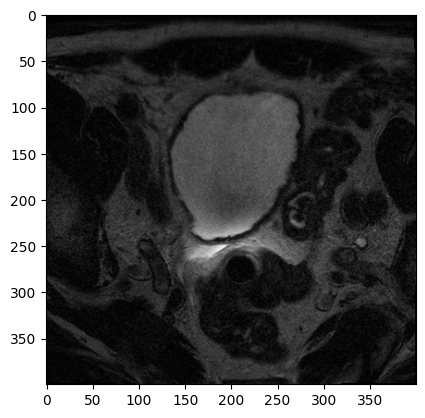

In [26]:
# You can download a random image from this dataset

import pydicom
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Load the DICOM file
dicom_path = r'33bd40ad-e0a2-4023-9234-dbb4cb8ef60b.dcm'

dicom_data = pydicom.dcmread(dicom_path)

# Get the pixel array from the DICOM file
pixel_array = dicom_data.pixel_array

# Normalize the pixel values to the range [0, 255]
pixel_array = pixel_array - np.min(pixel_array)
pixel_array = (pixel_array / np.max(pixel_array) * 255).astype(np.uint8)

# Convert the NumPy array to a PIL Image
image = Image.fromarray(pixel_array)
plt.imshow(image,cmap="gray")
plt.show()
